# ADVARSEL: NÅR ANIMATIONEN ER FÆRDIG SKAL KODEN I BUNDEN KOMMENTERES UD OG CELLEN KØRES IGEN FØR DER GEMMES. ELLERS GEMMER DU EN FIL PÅ 100+ MB!!!

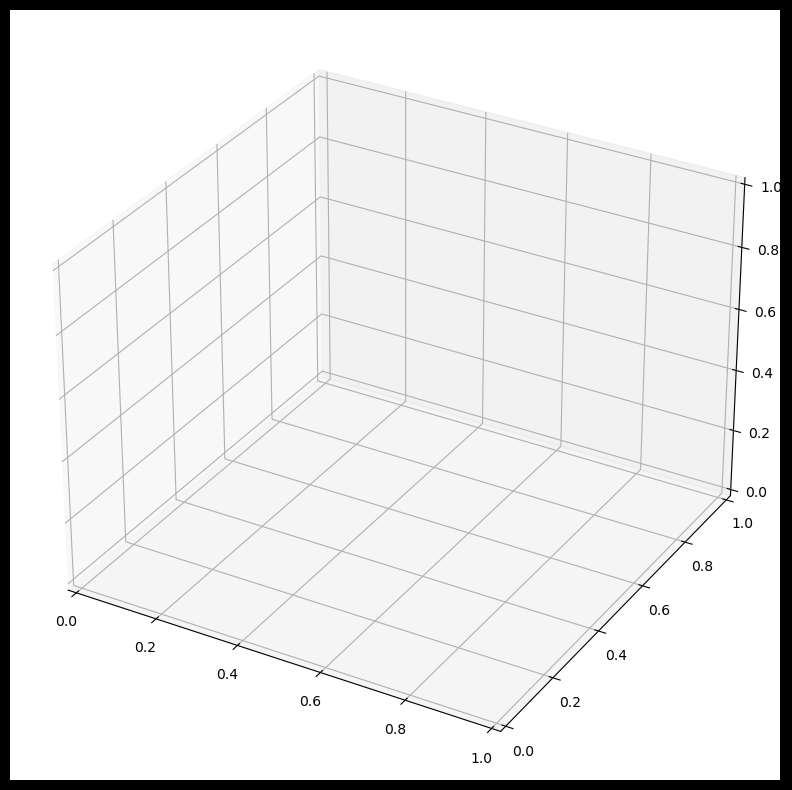

In [6]:
import numpy as np

import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

import matplotlib.pyplot as plt
import matplotlib.animation as animation

from IPython.display import HTML

import time

# Parameters
s=10
r=28
b=2.667

# Fixed points
fp_arr = [[0, 0, 0], [np.sqrt(b*(r-1)), np.sqrt(b*(r-1)), r-1], [-np.sqrt(b*(r-1)), -np.sqrt(b*(r-1)), r-1]]

# Initial state
r_vec_initial = [0, 1, 10]

# Random initial state
#r_vec_initial = np.random.uniform(low=-100, high=100, size=(3,))

# Time step size (s)
dt = 0.025

# Time to animate for (s)
total_duration = 5

# Calculate the number of time steps needed
n_time_steps = int(np.floor(total_duration / dt))

# Calculate the time interval between frames (ms)
# This is used to adjust the animation speed so it is consistent for different values of dt and total_duration
total_duration_ms = total_duration*1000
interval_ms = total_duration_ms / n_time_steps

# Colours
BACKGROUND_COLOR = "black"
PLOT_COLOR = "grey"

# Width of the plotted trajectory
LW = 1

# Camera rotation speed
ROTATION_SPEED = 1/2

# Integrate the Lorenz equations with the RK4 method
def lorenz(r_vec):
    x, y, z = r_vec
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y -b*z

    r_dot_vec = np.array([x_dot, y_dot, z_dot])

    return r_dot_vec

# RK4 implementation
def RK4(r_vec):
    k1 = lorenz(r_vec) * dt
    k2 = lorenz(r_vec + 1/2 * k1) * dt
    k3 = lorenz(r_vec + 1/2 *k2) *dt
    k4 = lorenz(r_vec + k3) * dt 

    return r_vec + 1/6*(k1 + 2*k2 + 2*k3 + k4)

# There are n_time_step states of the system, each with three coordiantes, so we store the states in a n x 3 array
pos = np.zeros((n_time_steps, 3))

# Apply initial conditions
for i in range(3):
    pos[0, i] = r_vec_initial[i]

# The first element is determined by the initial conditions, so we update the i + 1st element
for i in range(n_time_steps - 1):
    pos[i + 1] = RK4(pos[i])

fig = plt.figure(facecolor=BACKGROUND_COLOR, figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")

# Update function for the animation
def update(i):
    if(i & 5 == 0):
        # Sets the viewpoint of the camera
        ax.view_init(0, -56 + i*ROTATION_SPEED) # + i*ROTATION_SPEED to rotate around the z-axis
        ax.clear()
        # Plot fixed points
        ax.scatter(fp_arr[0][0], fp_arr[0][1], fp_arr[0][2], color="red", label="Fixed Point #1")
        ax.scatter(fp_arr[1][0], fp_arr[1][1], fp_arr[1][2], color="lime", label="Fixed Point #2")
        ax.scatter(fp_arr[2][0], fp_arr[2][1], fp_arr[2][2], color="blue", label="Fixed Point #3")
        
        ax.set(facecolor=BACKGROUND_COLOR)
        ax.set_axis_off() # hides axes
        ax.plot(pos[:i, 0], pos[:i, 1], pos[:i, 2], color=PLOT_COLOR, linewidth=LW, label="Trajectory") # plot the trajectory up to the current point
        ax.scatter(pos[i, 0], pos[i, 1], pos[i, 2], color="white", linewidth=LW, marker="*")
        ax.legend()

    if i % (n_time_steps // 20) == 0:  # Print every 5%
        print(f"{int(i/(n_time_steps - 1) * 100)} %")


# Kommenter det her ud og kør cellen før du gemmer filen!!! Ellers gemmes en fil på 100+ MB!!!

# ani = animation.FuncAnimation(fig, update, frames=n_time_steps, interval = interval_ms*5, repeat = True)

# display(HTML(ani.to_jshtml()))
# plt.close()

